# 次元削減
> データを見やすくする
+ SVD ... 特異値分解
  + PCAと似ている
  + データを使って分析したい時
+ UMAP 
  + 綺麗な平面図を使いたい時

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('4-1_skill_level.csv', index_col=0)
df
# index_col=0

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6
F,6,6,9,9,8
G,3,2,5,6,4
H,10,9,9,8,10
I,5,4,8,5,7
J,2,2,4,3,2


In [27]:
df.index[0]

'A'

In [28]:
df.index[1]

'B'

In [29]:
df.index[2]

'C'

# svd

In [10]:
from sklearn.decomposition import TruncatedSVD

In [14]:
# create model, setting n_components
svd_model = TruncatedSVD(n_components=2)

# dimention decreased
# the amount of information has decreased as well
# fit_transform()
vector = svd_model.fit_transform(df)
vector

array([[18.01133639, -2.08959984],
       [ 7.27762252, -1.34850332],
       [13.43360847,  0.88719484],
       [18.48263999, -2.2094704 ],
       [13.5780639 ,  6.1876989 ],
       [17.11594851, -2.12956552],
       [ 9.08409326, -2.55117285],
       [20.52943048,  1.85110185],
       [13.08955913, -1.59539868],
       [ 5.84600801, -1.13171928],
       [12.27621495, -2.53269306],
       [18.16236577,  3.51346277],
       [11.26994049, -0.99784624],
       [12.60578035, -1.82569588],
       [17.33721911,  2.48094994]])

In [19]:
# pull x_culumn, y_culumn
X = vector[:, 0]
Y = vector[:, 1]

A 0 (18.01133638923489, -2.0895998367579995)
B 1 (7.277622522306346, -1.3485033159010587)
C 2 (13.433608469775058, 0.8871948405253832)
D 3 (18.48263998527272, -2.209470404736882)
E 4 (13.57806390192065, 6.18769889969454)
F 5 (17.115948505274936, -2.129565524441987)
G 6 (9.084093259075688, -2.5511728480069293)
H 7 (20.529430476928287, 1.8511018457299282)
I 8 (13.08955913417673, -1.5953986830399045)
J 9 (5.8460080139268165, -1.1317192821442759)
K 10 (12.276214953957192, -2.5326930609725973)
L 11 (18.16236577441012, 3.513462768092997)
M 12 (11.269940491348121, -0.997846242297711)
N 13 (12.605780345020587, -1.825695884136149)
O 14 (17.337219114013216, 2.4809499433737265)


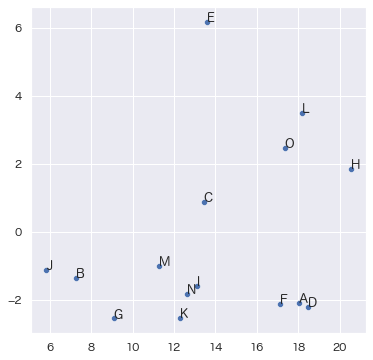

In [47]:
# setting for plot
# sns.scatterplot()
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X, y=Y)

# annotation 
# plt.annotate()
for i, (x_an, y_an) in enumerate(vector):
    plt.annotate(df.index[i], (x_an, y_an))

# use zip
for i, (x_an, y_an) in enumerate(zip(X, Y)):
    print(df.index[i], i, (x_an, y_an))

> 5次元から２次元に変わった

> どういう二次元かどうか（x、yの意味）は人間が考える

> 総合点がたいてい重要（x軸）

> y軸　→ ```model.components_``` を使う

In [38]:
X_comp, Y_comp = svd_model.components_
X_comp, Y_comp

(array([0.43065824, 0.40038966, 0.4588284 , 0.46472964, 0.47720484]),
 array([ 0.4623948 ,  0.61772725, -0.47003834, -0.42242911, -0.07226134]))

コミュニケーション 0 (0.4306582409517603, 0.4623948013447094)
リーダーシップ 1 (0.400389659533827, 0.6177272467678485)
プログラミング 2 (0.4588284029195104, -0.4700383370540097)
ネットワーク知識 3 (0.4647296430081939, -0.42242911366072144)
セキュリティ知識 4 (0.47720483612650955, -0.07226134458559427)


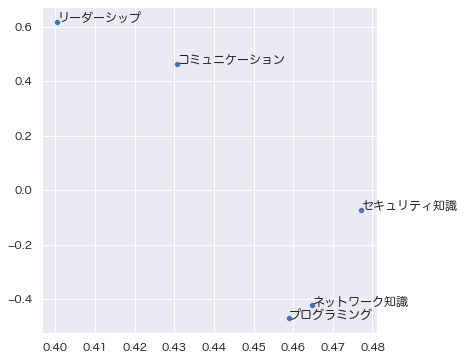

In [49]:
# setting for plot
# sns.scatterplot()
sns.set(font="Hiragino Maru Gothic Pro")
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_comp, y=Y_comp)

# annotation 
# plt.annotate()
for i, (x_an, y_an) in enumerate(zip(X_comp, Y_comp)):
    plt.annotate(df.columns[i], (x_an, y_an))


for i, (x_an, y_an) in enumerate(zip(X_comp, Y_comp)):
    print(df.columns[i], i, (x_an, y_an))

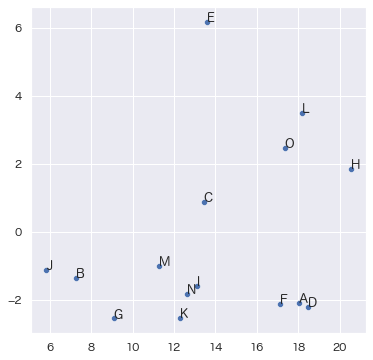

In [50]:
# setting for plot
# sns.scatterplot()
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X, y=Y)

# annotation 
# plt.annotate()
for i, (x_an, y_an) in enumerate(vector):
    plt.annotate(df.index[i], (x_an, y_an))

> x軸 ... 能力

> y軸 ... 上の方がヒューマンスキル、下の方がITスキルより

In [53]:
# 寄与度
svd_model.explained_variance_ratio_

# 第一主成分　x軸　６８％
# 第二主成分　y軸 24%
# 二次元にしたけどデータ量は92(=68+24)%残っている

array([0.67907875, 0.247028  ])

# UMAP

In [57]:
!pip3 install umap-learn

  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached numba-0.55.2-cp39-cp39-macosx_10_14_x86_64.whl (2.3 MB)
  Using cached pynndescent-0.5.7.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached llvmlite-0.38.1-cp39-cp39-macosx_10_9_x86_64.whl (25.5 MB)
Using legacy 'setup.py install' for umap-learn, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pynndescent, since package 'wheel' is not installed.
  Running setup.py install for pynndescent ... done
  Running setup.py install for umap-learn ... done
You should consider upgrading via the '/Users/aito1/py-ml/サンプルコード/.env/bin/python3.9 -m pip install --upgrade pip' command.


In [68]:
# use umap-learn
import umap.umap_ as umap

# when using umap
from scipy.sparse.csgraph import connected_components

In [66]:
# create model, setting n_components, n_neighbors
# focus on n_neighbors
umap_model = umap.UMAP(n_components=2, n_neighbors=6)

vector = umap_model.fit_transform(df)

In [61]:
# pull x_culumn, y_culumn
X = vector[:, 0]
Y = vector[:, 1]

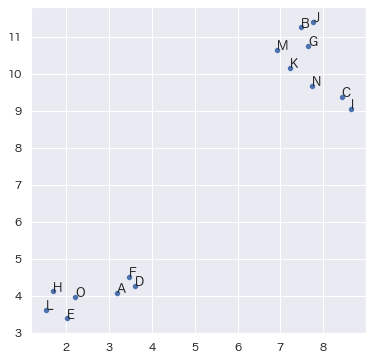

In [63]:
# setting for plot
# sns.scatterplot()
sns.set(font="Hiragino Maru Gothic Pro")
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X, y=Y)

# annotation 
# plt.annotate()
for i, (x_an, y_an) in enumerate(vector):
    plt.annotate(df.index[i], (x_an, y_an))